# CS Streaming: Netflix Data Analysis

## Project Brief 

The CEO of CS-Streaming has brought you and your team in to analyse Netflix data for their new streaming service. 

They are confident that your analysis will be helpful to you in making decisions about their service. 

They need your expertise to **uncover trends and insights from the Netflix data that will be beneficial to their new product.** 

They are eager to begin this project and will therefore need a timely response.

You are to report on **how CS-Streaming can best optimise its services and compete with Netflix.**

In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt 
df = pd.read_csv('/workspaces/cs-streaming-hackathon/data/netflix_titles.csv')

In [4]:
df.fillna(value='unknown')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,unknown,unknown,unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
#converts date to string
df['date_added'] = df['date_added'].str.replace(r',', '', regex=True)


In [6]:
#converts date to date time
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d %Y', errors='coerce')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

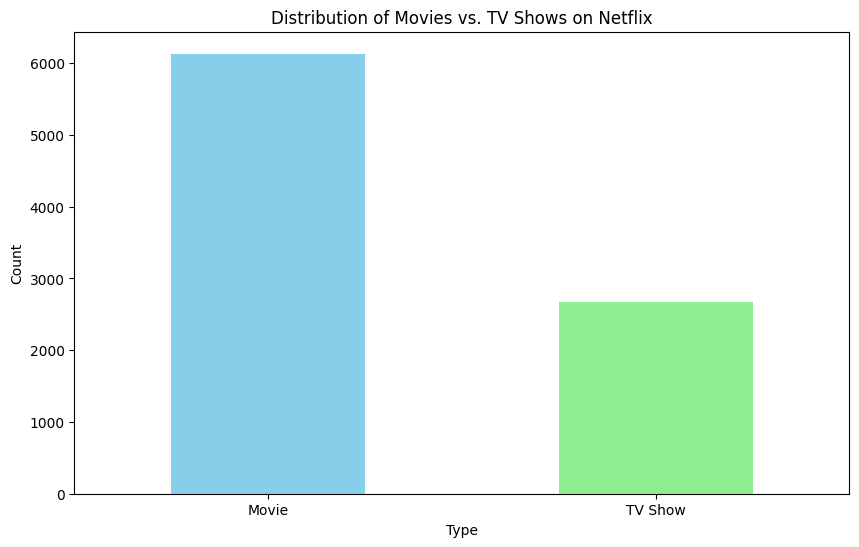

In [7]:
#distribution of movies vs tv shows chart
type_counts = df['type'].value_counts()
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

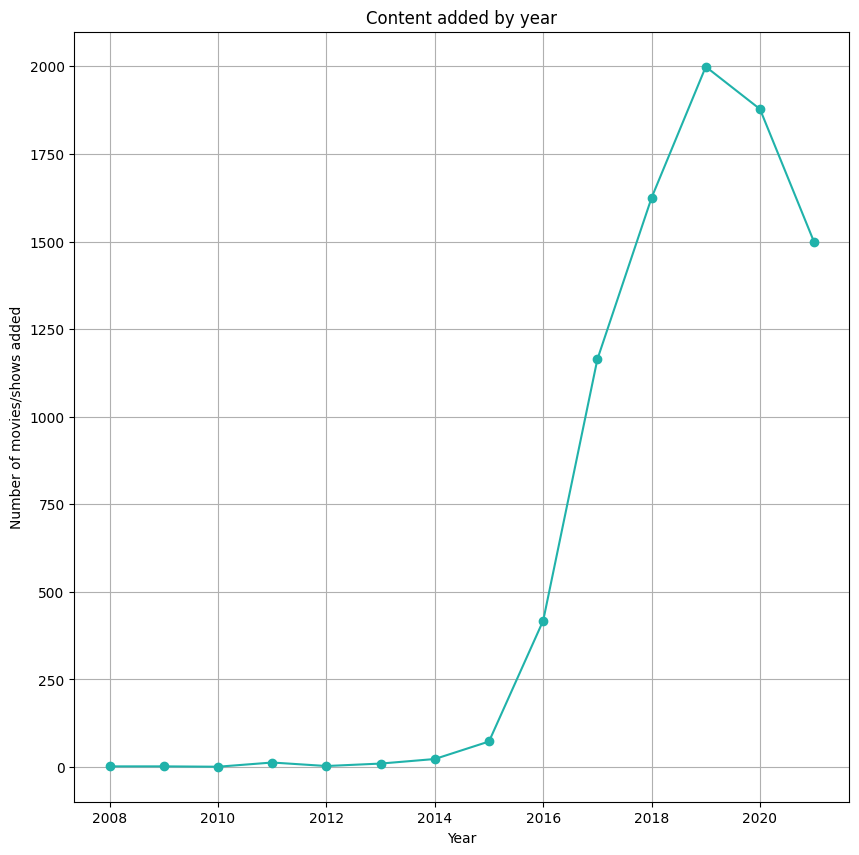

In [8]:
#content added by year graph
df['year_added'] = df['date_added'].dt.year
year_addedtimeseries = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,10))
year_addedtimeseries.plot(kind='line', marker='o', color='lightseagreen')
plt.title('Content added by year')
plt.xlabel('Year')
plt.ylabel('Number of movies/shows added')
plt.grid(True)
plt.show()

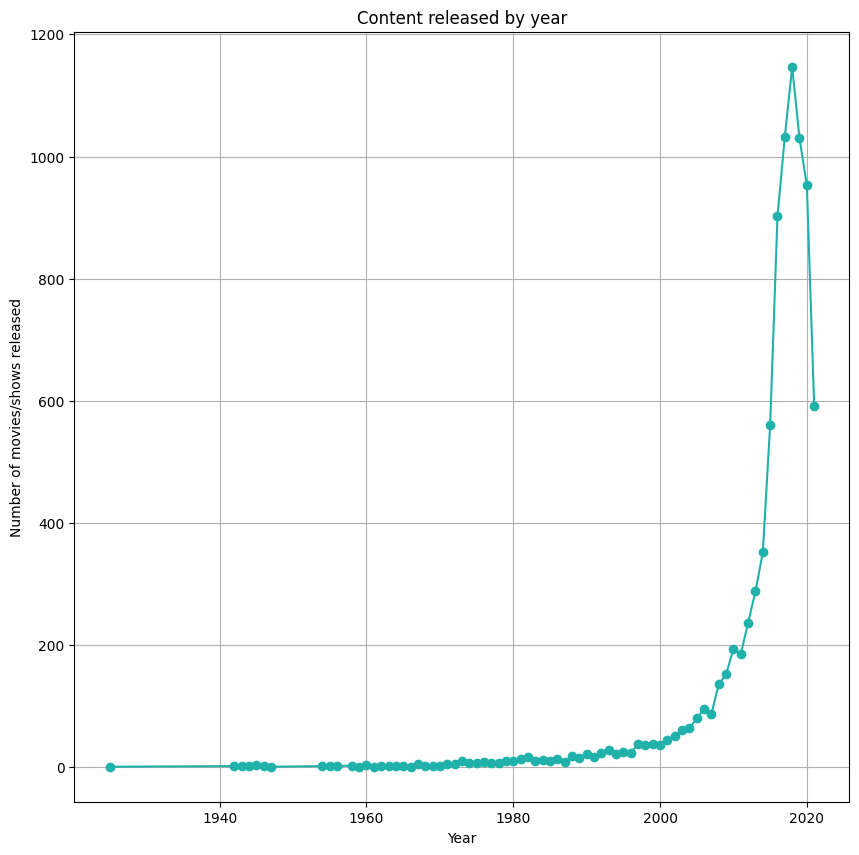

In [9]:
#content release date graph

releaseyeartimeseries = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,10))
releaseyeartimeseries.plot(kind='line', marker='o', color='lightseagreen')
plt.title('Content released by year')
plt.xlabel('Year')
plt.ylabel('Number of movies/shows released')
plt.grid(True)
plt.show()

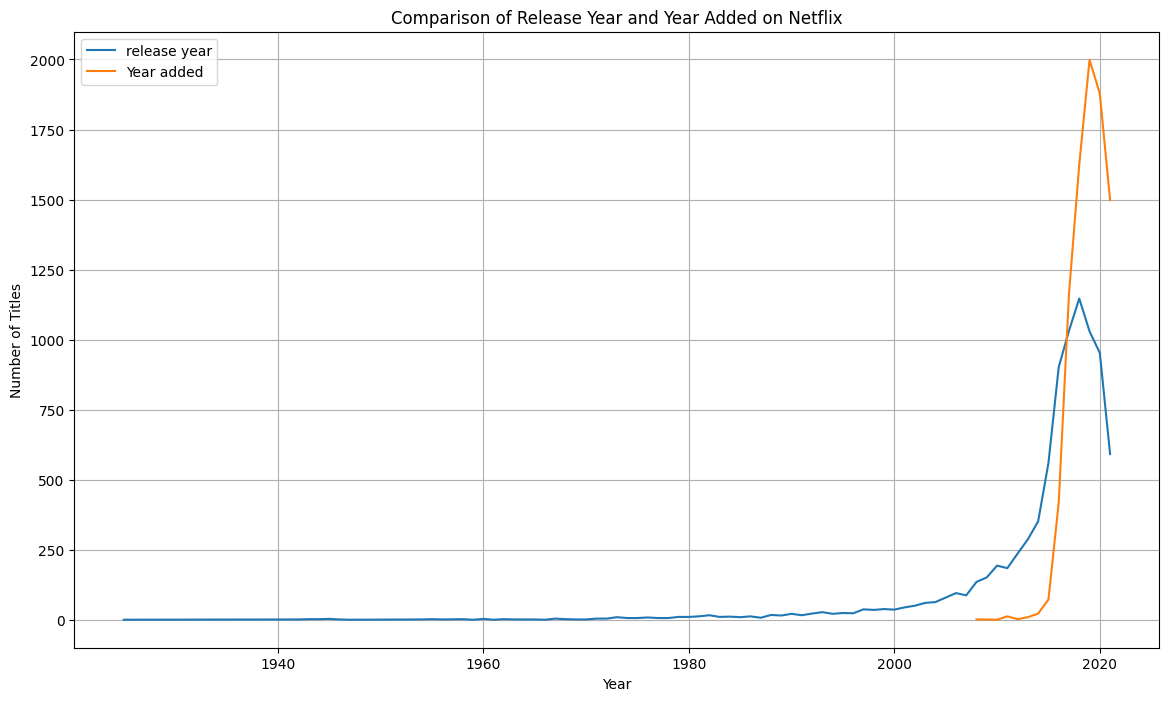

In [10]:
#release year and added year comparison
plt.figure(figsize=(14,8))
plt.plot(releaseyeartimeseries.index, releaseyeartimeseries.values, label = 'release year')
plt.plot(year_addedtimeseries.index, year_addedtimeseries.values, label = 'Year added')
plt.title('Comparison of Release Year and Year Added on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#number of times cast appear in films/shows
actordf = df.copy()
actordf = actordf[(df['cast'].str.lower() != 'nan')]
actordf = actordf.dropna(subset=['cast'])
actordf['cast'] = actordf['cast'].astype(str)
actors = actordf['cast']
actors = actors.str.split(', ')
actor_count = Counter(actor for sublist in actors for actor in sublist)
actordf = actor_df = pd.DataFrame(actor_count.items(), columns=['Actor', 'Appearances']).sort_values(by='Appearances', ascending=False)
actordf.head(20)

,Actor,Appearances
1433,Anupam Kher,43
782,Shah Rukh Khan,35
303,Julie Tejwani,33
1634,Naseeruddin Shah,32
4942,Takahiro Sakurai,32
304,Rupa Bhimani,31
1558,Akshay Kumar,30
11643,Om Puri,30
4468,Yuki Kaji,29
7422,Paresh Rawal,28


In [12]:
#mean and median apperances
mean_appearences = actordf['Appearances'].mean()
mean_appearences



1.7598177776558084